# 데이터 전처리
https://www.kaggle.com/mathchi/diabetes-data-set

In [1]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
당뇨병 = pd.read_csv('diabetes.csv')
당뇨병.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 상관관계 분석

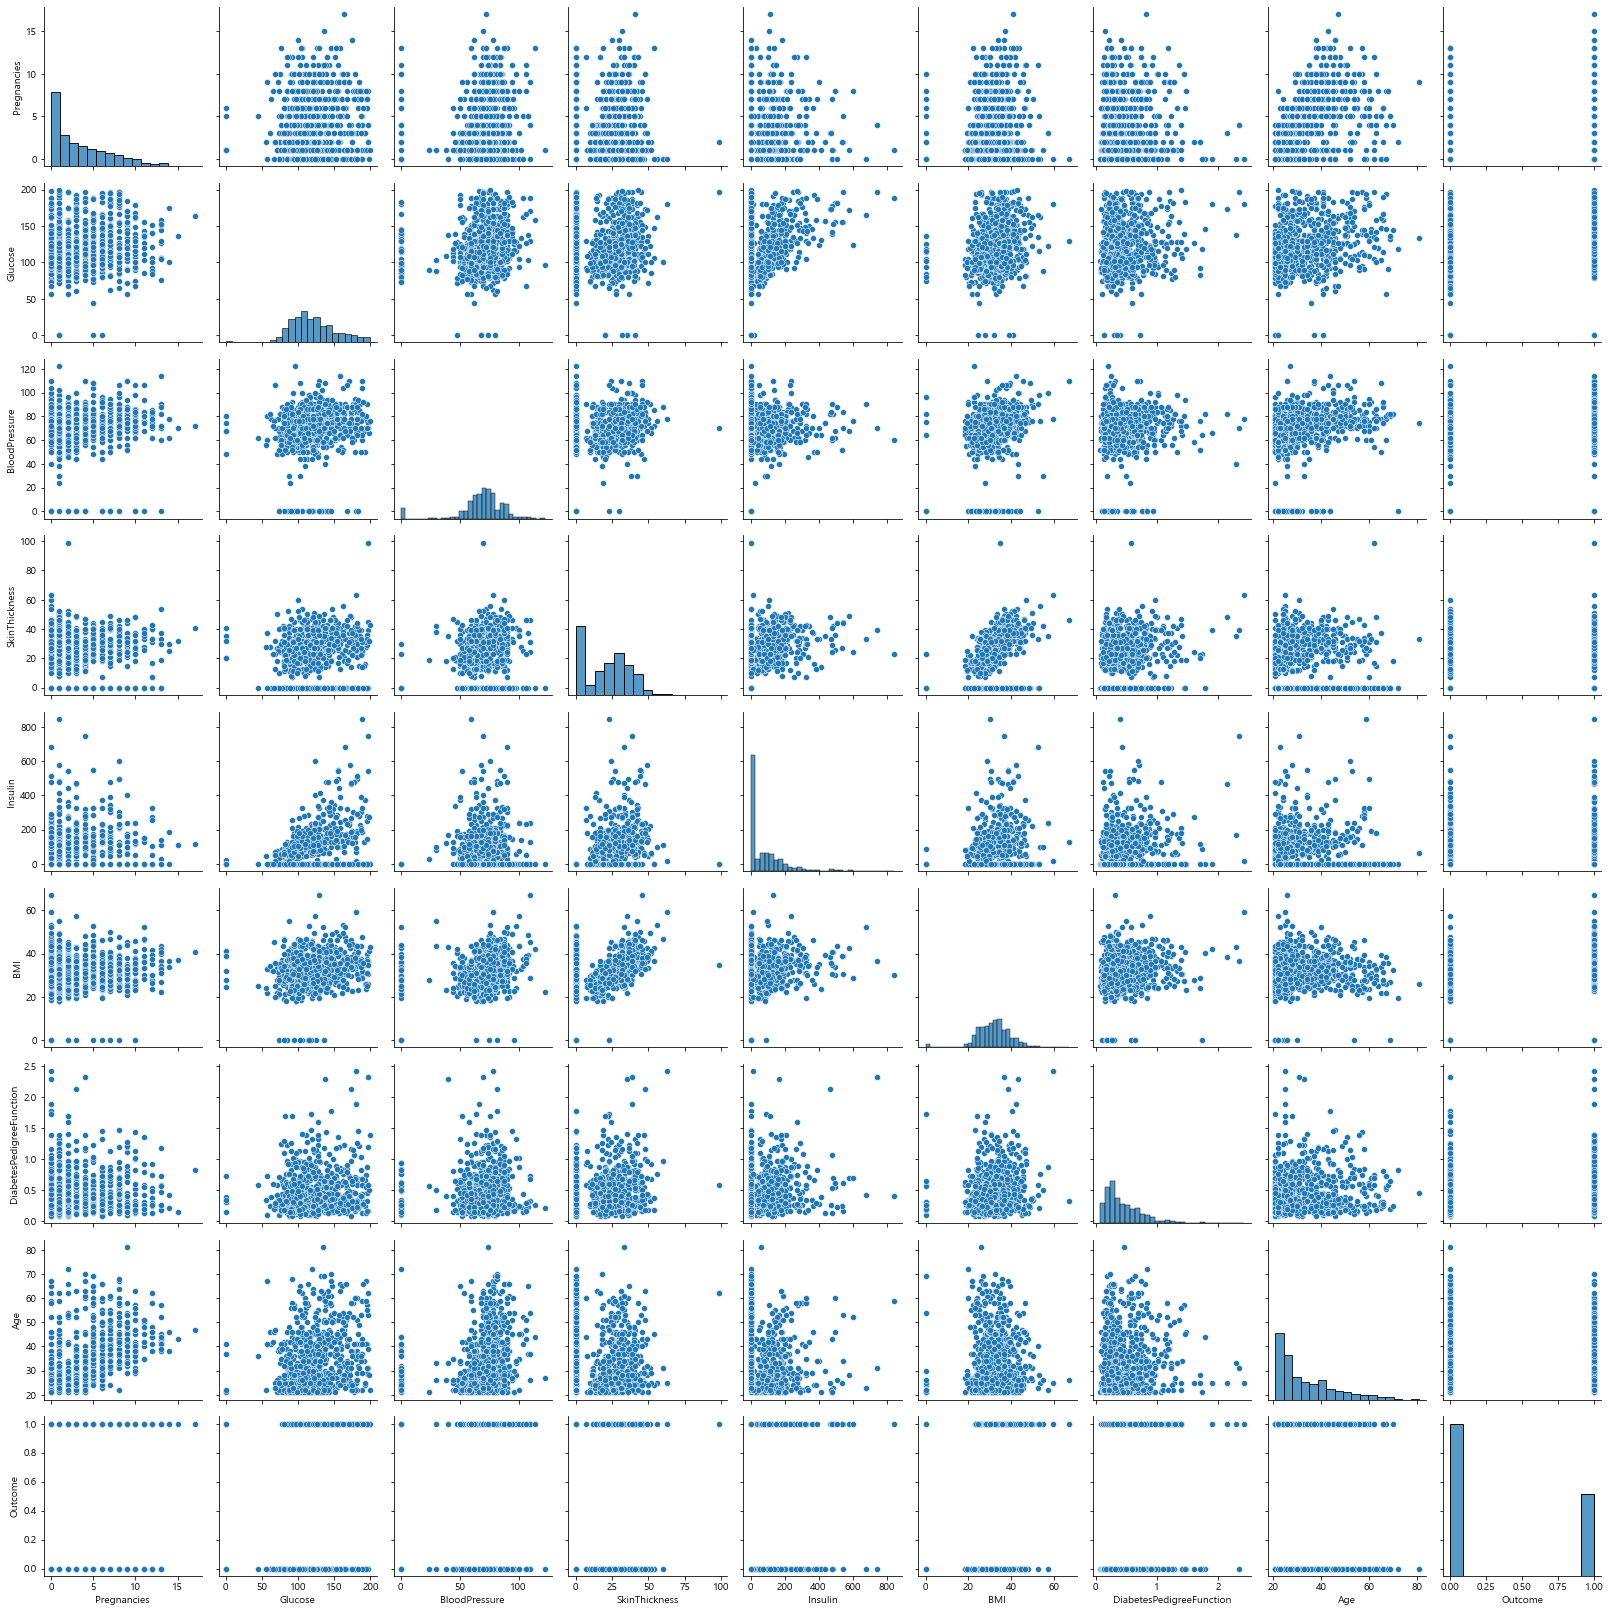

In [3]:
sns.pairplot(당뇨병)
plt.tight_layout()
plt.show()

# RandomForest로 학습

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [5]:
당뇨병

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
data_y=당뇨병['Outcome']
X_features=당뇨병.drop(['Outcome'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X_features,data_y,test_size=0.3,random_state=777)
model_randomForest = RandomForestClassifier()
model_randomForest.fit(X_train, y_train)

RandomForestClassifier()

In [7]:
model_randomForest.score(X_test,y_test)

0.7532467532467533

In [8]:
model_randomForest.feature_importances_

array([0.07931695, 0.23678474, 0.08930719, 0.06793125, 0.07425066,
       0.17192612, 0.13804184, 0.14244126])

(-1.0, 8.0)

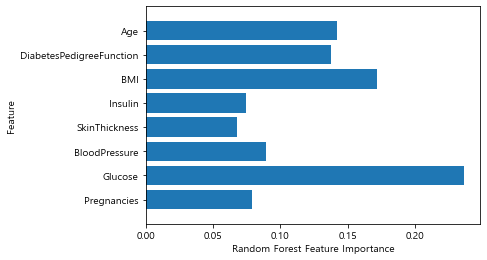

In [9]:
n_features = X_train.shape[1]
plt.barh(np.arange(n_features), model_randomForest.feature_importances_, align="center")
plt.yticks(np.arange(n_features), X_test.columns)
plt.xlabel("Random Forest Feature Importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)